In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from nltk.tokenize import word_tokenize as wt
# from collections import Counter
import gensim
# import textblob
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, Bidirectional

In [ ]:
df_news = pd.read_csv('/content/gdrive/MyDrive/Dataset/lenta-ru-news.csv')

In [ ]:
df_news

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


In [ ]:
df_news.topic.value_counts()

Россия               160445
Мир                  136621
Экономика             79528
Спорт                 64413
Культура              53797
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44663
Из жизни              27605
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               65
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: topic, dtype: int64

In [ ]:
df_news.date.value_counts()

2019/12/05    284
2019/12/10    281
2016/12/01    278
2019/10/09    276
2019/06/20    275
             ... 
2000/02/27      1
1999/11/20      1
1999/12/26      1
1914/09/18      1
1999/10/03      1
Name: date, Length: 7393, dtype: int64

In [ ]:
df_news['date'] = pd.to_datetime(df_news['date'], format='%Y/%m/%d')

In [ ]:
df_news_2017 = df_news[df_news['date'].dt.year == 2017]

In [ ]:
df_news_2017

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2017/01/01/mirzaevdelo/,Возбуждено дело по факту избиения Расула Мирзаева,Следственный комитет России возбудил уголовное...,Спорт,Бокс и ММА,2017-01-01
1,https://lenta.ru/news/2017/01/01/dagestan/,Двое силовиков пострадали в спецоперации в Даг...,В Новолакском районе Дагестана проходит спецоп...,Силовые структуры,Криминал,2017-01-01
2,https://lenta.ru/news/2017/01/01/39/,Число жертв атаки на ночной клуб в Стамбуле во...,В результате нападения на ночной клуб Reina в ...,Мир,Преступность,2017-01-01
3,https://lenta.ru/news/2017/01/01/lukashenko/,Лукашенко призвал белорусов держать порох сухим,Президент Белоруссии Александр Лукашенко в нов...,Бывший СССР,Белоруссия,2017-01-01
4,https://lenta.ru/news/2017/01/01/putin/,Путин отреагировал на теракт в Стамбуле,Президент России Владимир Путин направил турец...,Россия,Политика,2017-01-01
...,...,...,...,...,...,...
57739,https://lenta.ru/news/2017/12/31/protest/,Два человека погибли при погромах в Иране,Два человека погибли в ходе антиправительствен...,Мир,Общество,2017-12-31
57740,https://lenta.ru/news/2017/12/31/mad_russia/,Опубликован трейлер чемпионата мира по футболу...,Издание Bleacher Report в своем Twitter-аккаун...,Спорт,Футбол,2017-12-31
57741,https://lenta.ru/news/2017/12/31/pushkin/,Украинцы украли стоявший с царских времен бюст...,В Чернигове украден бюст русского поэта Алекса...,Бывший СССР,Украина,2017-12-31
57742,https://lenta.ru/news/2017/12/31/vk/,«ВКонтакте» случайно перешла на мову,Социальная сеть «ВКонтакте» разослала пользова...,Интернет и СМИ,Coцсети,2017-12-31


In [ ]:
df_news_2017.reset_index(drop=True, inplace=True)

In [ ]:
df_news_2017.topic.value_counts()

россия               9530
мир                  8732
спорт                5521
силовые структуры    4852
Name: topic, dtype: int64

In [ ]:
df_news_2017.info()

<bound method DataFrame.info of                    topic                                               data  \
0                  спорт  Возбуждено дело по факту избиения Расула Мирза...   
1      силовые структуры  Двое силовиков пострадали в спецоперации в Даг...   
4                  спорт  Опубликовано видео лучших моментов матча Росси...   
5                    мир  Эрдоган назвал цель стамбульского теракта Цель...   
6                 россия  В МЧС констатировали отсутствие серьезных прои...   
...                  ...                                                ...   
28634             россия  На Сахалине пошумели и спалили дотла 25-метров...   
28635              спорт  Боксер Дрозд завершил карьеру Российский боксе...   
28636              спорт  Нападающий «Манчестер Сити» заплакал из-за пол...   
28641              спорт  Опубликован трейлер чемпионата мира по футболу...   
28642  силовые структуры  СК спустя три дня после Путина признал взрыв в...   

                   

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Оружие'].index)

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Культпросвет'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == '69-я параллель'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Крым'].index)

In [ ]:
df_news_2017.reset_index(drop=True, inplace=True)

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Дом'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Из жизни'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Бизнес'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Путешествия'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Наука и техника'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Ценности'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Экономика'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Интернет и СМИ'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Культура'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Бывший СССР'].index)

In [ ]:
df_news_2017

,url,title,text,topic,tags,date,data
0,https://lenta.ru/news/2017/01/01/mirzaevdelo/,Возбуждено дело по факту избиения Расула Мирзаева,Следственный комитет России возбудил уголовное...,спорт,Бокс и ММА,2017-01-01,Возбуждено дело по факту избиения Расула Мирза...
1,https://lenta.ru/news/2017/01/01/dagestan/,Двое силовиков пострадали в спецоперации в Даг...,В Новолакском районе Дагестана проходит спецоп...,силовые структуры,Криминал,2017-01-01,Двое силовиков пострадали в спецоперации в Даг...
2,https://lenta.ru/news/2017/01/01/39/,Число жертв атаки на ночной клуб в Стамбуле во...,В результате нападения на ночной клуб Reina в ...,мир,Преступность,2017-01-01,Число жертв атаки на ночной клуб в Стамбуле во...
4,https://lenta.ru/news/2017/01/01/putin/,Путин отреагировал на теракт в Стамбуле,Президент России Владимир Путин направил турец...,россия,Политика,2017-01-01,Путин отреагировал на теракт в Стамбуле Презид...
5,https://lenta.ru/news/2017/01/01/russvk/,Опубликовано видео лучших моментов матча Росси...,Появилось видео с лучшими моментами матча моло...,спорт,Хоккей,2017-01-01,Опубликовано видео лучших моментов матча Росси...
...,...,...,...,...,...,...,...
57737,https://lenta.ru/news/2017/12/31/zahoronenie/,Массовые захоронения жертв ИГ обнаружили в Ракке,Два массовых захоронения жертв боевиков террор...,мир,Конфликты,2017-12-31,Массовые захоронения жертв ИГ обнаружили в Рак...
57738,https://lenta.ru/news/2017/12/31/putin/,Появилось новогоднее обращение Путина,В сети появилась видеозапись новогоднего обращ...,россия,Политика,2017-12-31,Появилось новогоднее обращение Путина В сети п...
57739,https://lenta.ru/news/2017/12/31/protest/,Два человека погибли при погромах в Иране,Два человека погибли в ходе антиправительствен...,мир,Общество,2017-12-31,Два человека погибли при погромах в Иране Два ...
57740,https://lenta.ru/news/2017/12/31/mad_russia/,Опубликован трейлер чемпионата мира по футболу...,Издание Bleacher Report в своем Twitter-аккаун...,спорт,Футбол,2017-12-31,Опубликован трейлер чемпионата мира по футболу...


In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Культпросвет'].index)

In [ ]:
df_news_2017['topic'] = df_news_2017['topic'].str.strip()

In [ ]:
df_news_2017['topic'] = df_news_2017['topic'].str.lower()

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'культпросвет'].index)

In [ ]:
df_news_2017['data'] = df_news_2017['title']+' '+df_news_2017['text']

In [ ]:
df_news_2017.drop(columns=['url', 'title', 'text', 'tags', 'date'], inplace=True)

In [ ]:
df_news_2017

,topic,data
0,спорт,Возбуждено дело по факту избиения Расула Мирза...
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...
2,мир,Число жертв атаки на ночной клуб в Стамбуле во...
3,россия,Путин отреагировал на теракт в Стамбуле Презид...
4,спорт,Опубликовано видео лучших моментов матча Росси...
...,...,...
28638,мир,Массовые захоронения жертв ИГ обнаружили в Рак...
28639,россия,Появилось новогоднее обращение Путина В сети п...
28640,мир,Два человека погибли при погромах в Иране Два ...
28641,спорт,Опубликован трейлер чемпионата мира по футболу...


In [ ]:
df_news_2017.reset_index(drop=True, inplace=True)

In [ ]:
N = 4500

In [ ]:
rows_to_remove = df_news_2017[df_news_2017['topic'] == 'россия'].sample(n=N, random_state=42).index

In [ ]:
len(rows_to_remove)

4500

In [ ]:
df_news_2017 = df_news_2017.drop(rows_to_remove)

In [ ]:
df_news_2017

,topic,data
0,спорт,Возбуждено дело по факту избиения Расула Мирза...
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...
2,мир,Число жертв атаки на ночной клуб в Стамбуле во...
4,спорт,Опубликовано видео лучших моментов матча Росси...
5,мир,Эрдоган назвал цель стамбульского теракта Цель...
...,...,...
28636,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...
28638,мир,Массовые захоронения жертв ИГ обнаружили в Рак...
28640,мир,Два человека погибли при погромах в Иране Два ...
28641,спорт,Опубликован трейлер чемпионата мира по футболу...


In [ ]:
df_news_2017.topic.value_counts()

мир                  5032
россия               5030
спорт                4921
силовые структуры    4852
Name: topic, dtype: int64

In [ ]:
N = 3700

In [ ]:
rows_to_remove = df_news_2017[df_news_2017['topic'] == 'мир'].sample(n=N, random_state=42).index

In [ ]:
df_news_2017 = df_news_2017.drop(rows_to_remove)

In [ ]:
N=600

In [ ]:
rows_to_remove = df_news_2017[df_news_2017['topic'] == 'спорт'].sample(n=N, random_state=42).index

In [ ]:
df_news_2017 = df_news_2017.drop(rows_to_remove)

In [ ]:
import re
import string

In [ ]:
def clean_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_news_2017.data.iloc[0]

'Возбуждено дело по\xa0факту избиения Расула Мирзаева Следственный комитет России возбудил уголовное дело по факту нападения на бойца смешанного стиля (ММА) Расула Мирзаева в Москве. Об этом в воскресенье, 1 января, сообщает ТАСС со ссылкой на слова представителя московского главка СКР. «Уголовное дело возбуждено по части 2 статьи 112 УК РФ ("Умышленное причинение средней тяжести вреда здоровью") и части 2 статьи 139 УК РФ ("Нарушение неприкосновенности жилища")», — заявили в управлении. В ночь на 31 декабря 30-летний Мирзаев был избит и ранен из травматического пистолета на улице Восточная. Нападавшие скрылись с места преступления. Бойца госпитализировали и прооперировали, врачи оценили его состояние как нормальное, жизни спортсмена ничего не угрожает. 16 ноября Мирзаев потерпел первое поражение в карьере от американца грузинского происхождения Левана Макашвили. В его активе 17 побед и одно поражение. Имя Расула Мирзаева стало широко обсуждаться в СМИ в августе 2011 года, когда во вре

In [ ]:
df_news_2017['data_clean'] = df_news_2017['data'].apply(clean_text)

In [ ]:
df_news_2017['data_clean'].iloc[0]

'возбуждено дело по факту избиения расула мирзаева следственный комитет россии возбудил уголовное дело по факту нападения на бойца смешанного стиля  мма  расула мирзаева в москве  об этом в воскресенье   января  сообщает тасс со ссылкой на слова представителя московского главка скр   уголовное дело возбуждено по части  статьи  ук рф   умышленное причинение средней тяжести вреда здоровью   и части  статьи  ук рф   нарушение неприкосновенности жилища       заявили в управлении  в ночь на  декабря  летний мирзаев был избит и ранен из травматического пистолета на улице восточная  нападавшие скрылись с места преступления  бойца госпитализировали и прооперировали  врачи оценили его состояние как нормальное  жизни спортсмена ничего не угрожает   ноября мирзаев потерпел первое поражение в карьере от американца грузинского происхождения левана макашвили  в его активе  побед и одно поражение  имя расула мирзаева стало широко обсуждаться в сми в августе  года  когда во время конфликта у московско

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stopwords = stopwords.words("russian")

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
def tokenize(text):
    text_clean = []
    text_tokenized = word_tokenize(text, language="russian")
    for word in text_tokenized:
        if len(word) > 1 and word not in stopwords:
            text_clean.append(word)
    return text_clean

In [ ]:
df_news_2017['tokenized'] = df_news_2017.data_clean.apply(tokenize)

In [ ]:
df_news_2017

,topic,data,data_clean,tokenized
0,спорт,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...,"[возбуждено, дело, факту, избиения, расула, ми..."
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...,"[двое, силовиков, пострадали, спецоперации, да..."
4,спорт,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...,"[опубликовано, видео, лучших, моментов, матча,..."
5,мир,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...,"[эрдоган, назвал, цель, стамбульского, теракта..."
6,россия,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...,"[мчс, констатировали, отсутствие, серьезных, п..."
...,...,...,...,...
28634,россия,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...,"[сахалине, пошумели, спалили, дотла, метровую,..."
28635,спорт,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...,"[боксер, дрозд, завершил, карьеру, российский,..."
28636,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...,"[нападающий, манчестер, сити, заплакал, получе..."
28641,спорт,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...,"[опубликован, трейлер, чемпионата, мира, футбо..."


In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7ef7cfae103638cec869569796b62dfd3b97d0173a52acebd8e176443113ec0b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
word = df_news_2017.tokenized.iloc[0][2]

In [ ]:
word

'факту'

In [ ]:
morph.parse(word)[0].normal_form

'факт'

In [ ]:
def lemmatize(text):
    text_lemmatized = []
    for word in text:
        text_lemmatized.append(morph.parse(word)[0].normal_form)

    return text_lemmatized

In [ ]:
df_news_2017['data_lemmatized'] = df_news_2017.tokenized.apply(lemmatize)

In [ ]:
df_news_2017

,topic,data,data_clean,tokenized,data_lemmatized
0,спорт,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...,"[возбуждено, дело, факту, избиения, расула, ми...","[возбудить, дело, факт, избиение, расул, мирза..."
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...,"[двое, силовиков, пострадали, спецоперации, да...","[двое, силовик, пострадать, спецоперация, даге..."
4,спорт,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...,"[опубликовано, видео, лучших, моментов, матча,...","[опубликовать, видео, хороший, момент, матч, р..."
5,мир,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...,"[эрдоган, назвал, цель, стамбульского, теракта...","[эрдоган, назвать, цель, стамбульский, теракт,..."
6,россия,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...,"[мчс, констатировали, отсутствие, серьезных, п...","[мчс, констатировать, отсутствие, серьёзный, п..."
...,...,...,...,...,...
28634,россия,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...,"[сахалине, пошумели, спалили, дотла, метровую,...","[сахалин, пошуметь, спалить, дотла, метровый, ..."
28635,спорт,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...,"[боксер, дрозд, завершил, карьеру, российский,...","[боксёр, дрозд, завершить, карьера, российский..."
28636,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...,"[нападающий, манчестер, сити, заплакал, получе...","[нападать, манчестер, сити, заплакать, получит..."
28641,спорт,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...,"[опубликован, трейлер, чемпионата, мира, футбо...","[опубликовать, трейлер, чемпионат, мир, футбол..."


In [ ]:
from nltk.probability import FreqDist

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase:
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

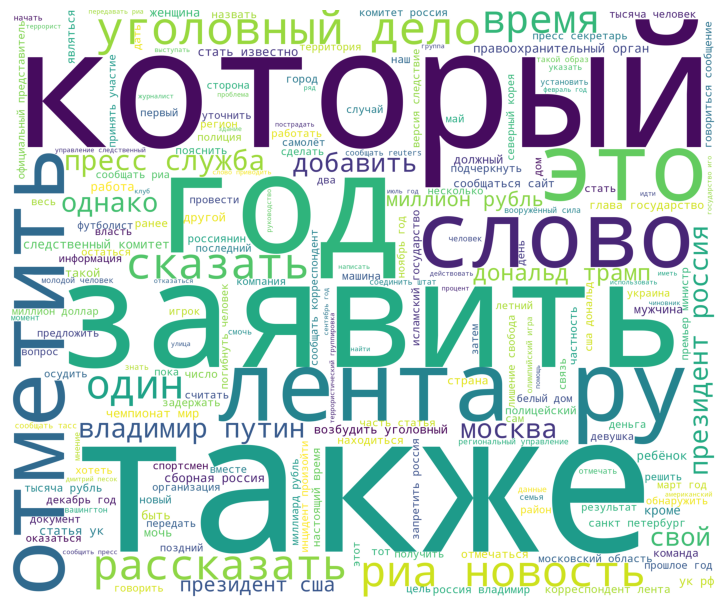

In [ ]:
corpus = get_corpus(df_news_2017['data_lemmatized'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [ ]:
freq = nltk.FreqDist(corpus)

In [ ]:
freq.most_common(10)

[('год', 25541),
 ('россия', 19338),
 ('который', 16254),
 ('российский', 9465),
 ('также', 9060),
 ('человек', 9019),
 ('заявить', 8985),
 ('сообщать', 8711),
 ('сша', 8695),
 ('президент', 8597)]

In [ ]:
freq_russia = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='россия'].values))

In [ ]:
freq_russia.most_common(10)

[('год', 6246),
 ('россия', 5753),
 ('который', 4547),
 ('президент', 3138),
 ('человек', 3081),
 ('глава', 2653),
 ('москва', 2631),
 ('также', 2575),
 ('путин', 2518),
 ('область', 2500)]

In [ ]:
freq_world = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='мир'].values))

In [ ]:
freq_world.most_common(10)

[('сша', 5722),
 ('год', 5115),
 ('россия', 4945),
 ('который', 4667),
 ('президент', 3975),
 ('трамп', 3738),
 ('человек', 3542),
 ('страна', 3476),
 ('заявить', 3323),
 ('сообщать', 3044)]

In [ ]:
freq_sport = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='спорт'].values))

In [ ]:
freq_sport.most_common(10)

[('год', 5300),
 ('матч', 4548),
 ('россия', 4036),
 ('команда', 3271),
 ('чемпионат', 3256),
 ('российский', 3167),
 ('сборная', 3148),
 ('который', 3106),
 ('мир', 2722),
 ('клуб', 2330)]

In [ ]:
freq_power = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='силовые структуры'].values))

In [ ]:
freq_power.most_common(10)

[('год', 8871),
 ('россия', 4602),
 ('дело', 4198),
 ('который', 3928),
 ('сообщить', 3449),
 ('суд', 2903),
 ('задержать', 2646),
 ('военный', 2621),
 ('также', 2508),
 ('уголовный', 2457)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def join_list(text):
    return ' '.join(text)

In [ ]:
df_news_2017['text_joined'] = df_news_2017.data_lemmatized.apply(join_list)

In [ ]:
df_news_2017

,topic,data,data_clean,tokenized,data_lemmatized,text_joined
0,2.0,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...,"[возбуждено, дело, факту, избиения, расула, ми...","[возбудить, дело, факт, избиение, расул, мирза...",возбудить дело факт избиение расул мирзаева сл...
1,3.0,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...,"[двое, силовиков, пострадали, спецоперации, да...","[двое, силовик, пострадать, спецоперация, даге...",двое силовик пострадать спецоперация дагестан ...
4,2.0,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...,"[опубликовано, видео, лучших, моментов, матча,...","[опубликовать, видео, хороший, момент, матч, р...",опубликовать видео хороший момент матч россия ...
5,1.0,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...,"[эрдоган, назвал, цель, стамбульского, теракта...","[эрдоган, назвать, цель, стамбульский, теракт,...",эрдоган назвать цель стамбульский теракт цель ...
6,0.0,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...,"[мчс, констатировали, отсутствие, серьезных, п...","[мчс, констатировать, отсутствие, серьёзный, п...",мчс констатировать отсутствие серьёзный происш...
...,...,...,...,...,...,...
28634,0.0,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...,"[сахалине, пошумели, спалили, дотла, метровую,...","[сахалин, пошуметь, спалить, дотла, метровый, ...",сахалин пошуметь спалить дотла метровый ёлка ц...
28635,2.0,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...,"[боксер, дрозд, завершил, карьеру, российский,...","[боксёр, дрозд, завершить, карьера, российский...",боксёр дрозд завершить карьера российский бокс...
28636,2.0,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...,"[нападающий, манчестер, сити, заплакал, получе...","[нападать, манчестер, сити, заплакать, получит...",нападать манчестер сити заплакать получить тра...
28641,2.0,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...,"[опубликован, трейлер, чемпионата, мира, футбо...","[опубликовать, трейлер, чемпионат, мир, футбол...",опубликовать трейлер чемпионат мир футбол стил...


In [ ]:
df_news_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19835 entries, 0 to 28642
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   topic            19835 non-null  float64
 1   data             19835 non-null  object 
 2   data_clean       19835 non-null  object 
 3   tokenized        19835 non-null  object 
 4   data_lemmatized  19835 non-null  object 
 5   text_joined      19835 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
df_news_2017.dropna(inplace=True)

In [ ]:
df_news_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19835 entries, 0 to 28642
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   topic            19835 non-null  float64
 1   data             19835 non-null  object 
 2   data_clean       19835 non-null  object 
 3   tokenized        19835 non-null  object 
 4   data_lemmatized  19835 non-null  object 
 5   text_joined      19835 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
df_news_2017.topic.replace({
    'россия': 0,
    'мир': 1,
    'спорт': 2,
    'силовые структуры': 3,
}, inplace = True)

In [ ]:
x = df_news_2017['text_joined']

In [ ]:
y = df_news_2017['topic']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=47)

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [ ]:
tfidf_train.shape, tfidf_test.shape

((15868, 52697), (3967, 52697))

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df_news_2017.dropna(inplace=True)

In [ ]:
pac = PassiveAggressiveClassifier(random_state = 37, loss = 'squared_hinge',  max_iter = 10, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

PassiveAggressiveClassifier(C=0.16, loss='squared_hinge', max_iter=10,
                            random_state=37)

In [ ]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 91.28%


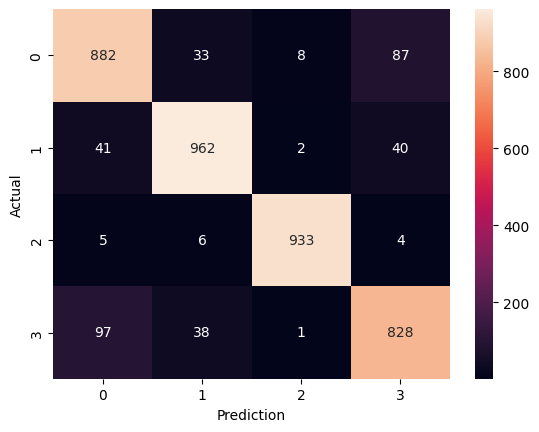

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
sns.set_theme(style='white')
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()